In [971]:
# Color constants
GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
GRAY_3 = "#4A606C"
GRAY_4 = "#171A1B"
BLUE_1 = "#5d97c0"
BLUE_11 = "#0284c7"
GRAY_11 = "#d1d5db"
GRAY_12 = "#989898"
GRAY_13 = "#4A606C"
ORANGE_1 = "#d6a34b"

In [972]:
import os
import pandas as pd

def load_file_for_year(folder_path, year):
    """
    Loads the Excel file for the given year from the specified folder.
    Returns a pandas DataFrame or None if not found.
    """
    year_str = str(year)
    files = os.listdir(folder_path)
    matched_files = [
        f for f in files
        if year_str in f and 'resultat' in f.lower() and f.endswith('.xlsx')
    ]

    if not matched_files:
        print(f"No files found for year {year}")
        return None

    if len(matched_files) > 1:
        print(f"Warning: Multiple files matched for year {year}: {matched_files}")
        return None

    filename = matched_files[0]
    filepath = os.path.join(folder_path, filename)
    print(f"Loading data from: {filename}")
    df = pd.read_excel(filepath)
    return df

# Set your folder path here
folder = '../data/resultat_kurser'
selected_year = 2025  # change this as needed

df = load_file_for_year(folder, selected_year)

if df is not None:
    print(f"Data shape: {df.shape}")
    display(df.head())
else:
    print("No data found.")



Loading data from: resultat-2025-for-kurser-inom-yh.xlsx
Data shape: (1026, 15)


,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2025,Antal beviljade platser start 2026,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2025/1001,Avslag,"Härryda kommun, Yrkeshögskolan i Mölnlycke",Frihandel och ursprung - fördjupning,"Ekonomi, administration och försäljning",0,0,0,30,Härryda,Västra Götaland,Göteborg,1,1,1
1,MYH 2025/1002,Beviljad,TUC Sweden AB - Yrkeshögskola,IT- och informationssäkerhet för administrativ...,Data/IT,30,30,60,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5
2,MYH 2025/1003,Beviljad,IHM Business School AB Göteborg,Digital redovisning & hållbarhetsrapportering,"Ekonomi, administration och försäljning",40,40,80,30,Göteborg,Västra Götaland,Göteborg,1,1,1
3,MYH 2025/1004,Beviljad,Lexicon Yrkeshögskola AB,Digitalisera dina utbildningar,Pedagogik och undervisning,35,35,70,50,Stockholm,Stockholm,Stockholm,1,1,1
4,MYH 2025/1005,Beviljad,Lexicon Yrkeshögskola AB,Producera digitala utbildningar,"Kultur, media och design",35,0,35,50,Stockholm,Stockholm,Stockholm,1,1,1


# Matplotlib:
### Find for a selected county:  
- overall number of courses that different schools applied for
- courses that were approved ("Beviljade")
- courses that were rejected ("Avslag")
- sorted by the percentage of approved courses
---------------------

- Placera nischområdena med hög godkännandegrad i fokus
- Det är lättare att upptäcka mönster som "små men lovande" områden
- Kontrasten blir omedelbart synlig när ett område med hög godkännandegrad har lägre totalt antal kurser

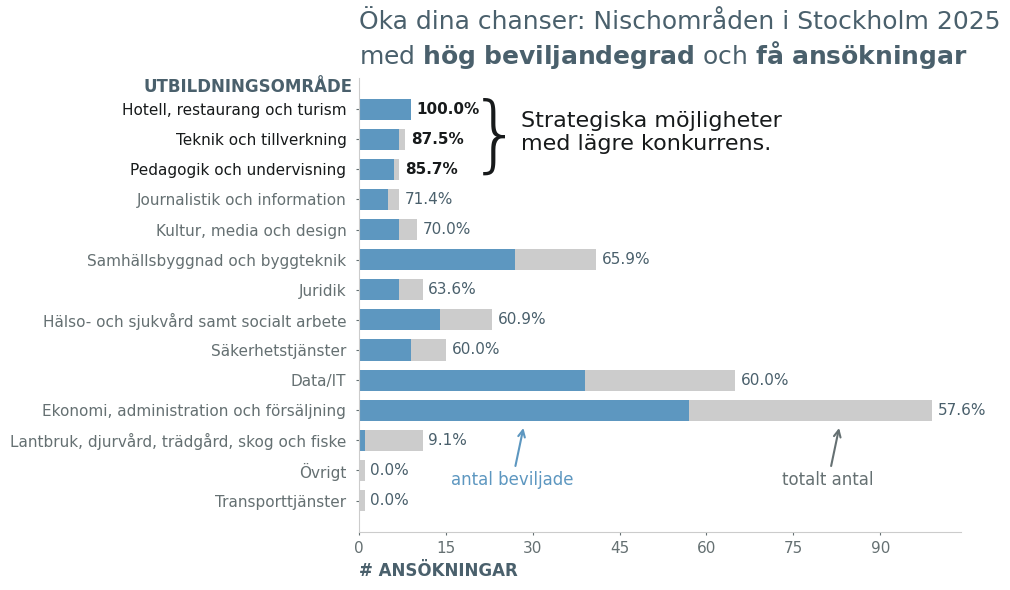

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'left': 'Öka dina chanser: Nischområden i Stockholm 2025\nmed $\\bf{hög}$ $\\bf{beviljandegrad}$ och $\\bf{få}$ $\\bf{ansökningar}$ '}, xlabel='# ANSÖKNINGAR', ylabel='UTBILDNINGSOMRÅDE'>)

In [973]:
def plot_education_area_bar_with_arrows(
        df, 
        county, 
        arrow_idx=None, 
        gray_1=GRAY_1, 
        blue_1=BLUE_1, 
        gray_2=GRAY_2, 
        gray_3=GRAY_3,
        gray_4=GRAY_4
        ):
    """
    Plots a horizontal bar chart showing total and approved courses per education area for a given county.
    Sorted by approval rate with arrow annotations that can be placed on a specific bar.
    
    Parameters:
        df: DataFrame with county data
        county: County name to filter
        arrow_idx: Index of category to place arrows on (None = top category, int = specific index)
    """
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator
    import matplotlib.patches as mpatches

    # Filter data for the selected county
    df_county = df[df["Län"] == county]

    # Count total and approved courses per education area
    total_courses = df_county.groupby("Utbildningsområde").size()
    approved_courses = df_county[df_county["Beslut"] == "Beviljad"].groupby("Utbildningsområde").size()

    # Combine into one DataFrame, fill missing with 0
    summary = pd.DataFrame({
        "Total": total_courses,
        "Approved": approved_courses
    }).fillna(0)

    # Calculate approval rate as percentage
    summary["Approval Rate %"] = (summary["Approved"] / summary["Total"] * 100).round(1)
    
    # Sort after approval rate
    summary = summary.sort_values("Approval Rate %")  
    # Identifiera de tre områdena med högst beviljandegrad
    top_areas = summary.sort_values("Approval Rate %", ascending=False).head(3).index.tolist()


    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    y_pos = range(len(summary))

    # Definiera staplelhöjd (mindre värde = större mellanrum)
    bar_height = 0.7  # Justera detta värde efter behov
    # Plot total courses as lighter bars
    ax.barh(y_pos, summary["Total"], height=bar_height, color=gray_1, label="Totalt")

    # Plot approved courses as darker bars on top
    ax.barh(y_pos, summary["Approved"], height=bar_height, color=blue_1, edgecolor=None, label="Beviljad")

    # Remove clutter
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['bottom', 'left']].set_color(gray_1)
    ax.tick_params(axis="both", colors=gray_2, labelsize=11, length=2, pad=5)
    ax.tick_params(axis="y", pad=7)

    # Axis labels and title
    ax.set_yticks(y_pos)
    ax.set_yticklabels(summary.index)
    # Uppdatera textfärger individuellt
    for i, label in enumerate(ax.get_yticklabels()):
        if summary.index[i] in top_areas:
            label.set_color(gray_4)  # Samma färg som för annoteringstexten
        else:
            label.set_color(gray_2)  # Standardfärg

    ax.set_ylabel("UTBILDNINGSOMRÅDE", loc="top",
                  fontdict=dict(color=gray_3, weight="bold", size=12), rotation=0)
    ax.yaxis.set_label_coords(-0.01, 0.96)
    ax.set_xlabel("# ANSÖKNINGAR", loc="left",
                  fontdict=dict(color=gray_3, weight="bold", size=12))
    
    ax.set_title(
    "Öka dina chanser: Nischområden i Stockholm 2025\nmed" + 
    r" $\bf{hög}$ $\bf{beviljandegrad}$" + 
    " och " + r"$\bf{få}$ $\bf{ansökningar}$" + " ",
    pad=10,
    fontdict=dict(color=gray_3, size=18),
    loc="left",
    )

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Add approval rate text labels to the right of total bars
    for i, rate in enumerate(summary["Approval Rate %"]):
        area_name = summary.index[i]
        text_color = gray_4 if area_name in top_areas else gray_3
        
        ax.text(
            summary["Total"].iloc[i] + max(summary["Total"])*0.01,
            i,
            f"{rate}%",
            va='center',
            color=text_color,  # Använd samma färglogik som för etiketterna
            fontsize=11,
            fontweight='bold' if area_name in top_areas else 'normal'  # Gör även fetstil för topp 3
        )
    
    
    # Determine which category to use for arrows
    if arrow_idx is None:
        # Default to top category
        arrow_idx = len(summary) - 1
    elif isinstance(arrow_idx, int):
        # Make sure index is valid
        arrow_idx = min(max(0, arrow_idx), len(summary) - 1)
    else:
        # Fallback to top category if invalid
        arrow_idx = len(summary) - 1
    
    # Get values for the selected category
    arrow_category_pos = arrow_idx  # Y-position of selected category
    arrow_total = summary["Total"].iloc[arrow_idx]
    arrow_approved = summary["Approved"].iloc[arrow_idx]
    
    # Add arrow for total applications
    ax.annotate(
        "totalt antal",
        xy=(arrow_total-16, arrow_category_pos-0.5),
        xytext=(arrow_total-18, arrow_category_pos - 2.5),  # Position slightly offset
        arrowprops=dict(
            arrowstyle="->",
            #connectionstyle="arc3,rad=0.2",
            color=gray_2,
            linewidth=1.5
        ),
        fontsize=12,
        color=gray_2,
        ha="center"
    )
    
    # Add arrow for approved applications
    ax.annotate(
        "antal beviljade",
        xy=(arrow_approved/2, arrow_category_pos-0.5),  # Point to middle of blue bar
        xytext=(arrow_approved/2 - 2, arrow_category_pos - 2.5),  # Position slightly offset
        arrowprops=dict(
            arrowstyle="->",
            #connectionstyle="arc3,rad=-0.2",
            color=blue_1,
            linewidth=1.5
        ),
        fontsize=12,
        color=blue_1,
        ha="center"
    )
    # Get max x-value for positioning
    max_x = max(summary["Total"])
    
    ax.annotate(
        xy=(19, 11.25), 
        text="}", 
        fontsize=60, 
        color=GRAY_4,
        fontfamily='DejaVu Sans',  # Choose a font with thinner characters
        fontweight='light'
    )
    # Add information about top 3 providers - only if we have at least 3 categories
    if len(summary) >= 3:
        # Get the third category from the top (in ascending sort order)
        annotate_pos = 12  
        annotate_category = summary.index[annotate_pos]
        
        ax.annotate(
            "Strategiska möjligheter\nmed lägre konkurrens.",
            xy=(summary["Total"].iloc[annotate_pos] + 20, annotate_pos-0.5),
            fontsize=16,
            color=gray_4,
            ha="left",
            va="bottom"
        )

    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Example usage med specifik index (t.ex. mitten av diagrammet):
plot_education_area_bar_with_arrows(df, county="Stockholm", arrow_idx=3)  # Sätt till ett lämpligt index

# Matplotlib:
### Find for a selected year:  
- overall number of students per education area
- number of females
- number of males
- sorted by the percentage of females
---------------------



In [974]:
import pandas as pd

# Load data
file_path = "../data/scb/Antagna som påbörjat studier på yrkeshögskolans kurser.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Clean column name for easier access
df.columns = df.columns.str.strip()

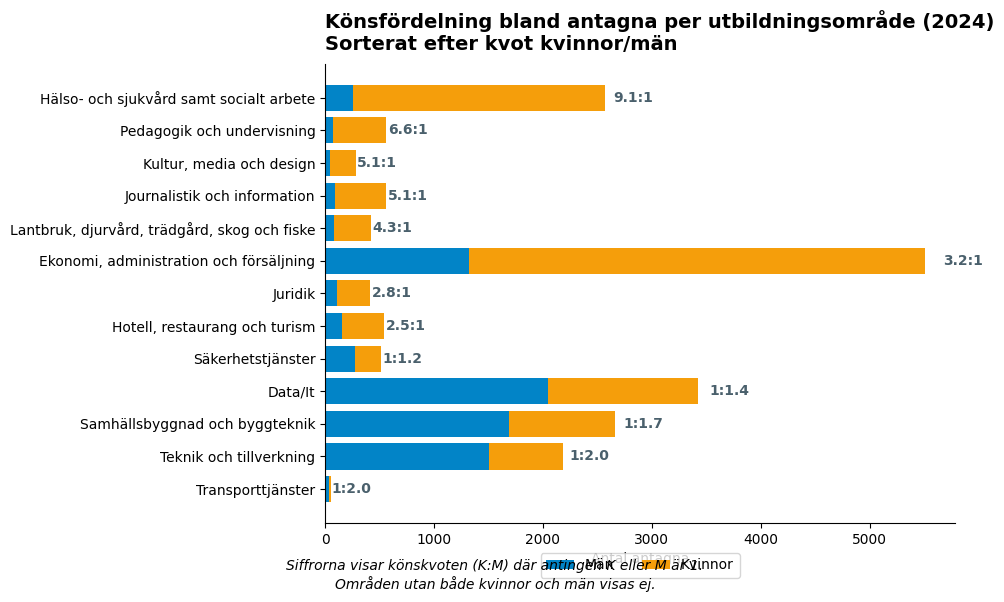

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'left': 'Könsfördelning bland antagna per utbildningsområde (2024)\nSorterat efter kvot kvinnor/män'}, xlabel='Antal antagna'>)

In [975]:
def plot_stacked_bar_antagna_matplotlib(df: pd.DataFrame, year: int = None) -> None:
    """
    Plots a horizontal stacked bar chart showing gender distribution of admitted students by education area.
    Uses matplotlib with sorting by female/male ratio in simplified format.
    
    Parameters:
        df: DataFrame with columns: kön, utbildningsområde, ålder, [2020-2024]
        year: Year to plot data for (int or str). If None, uses latest available year
    
    Returns:
        None - displays a matplotlib figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Input validation
    if df.empty:
        raise ValueError("DataFrame is empty")
    
    # Rename columns for consistency
    df.columns = ["kön", "utbildningsområde", "ålder", "2020", "2021", "2022", "2023", "2024"]
    df = df.fillna(0)

    # Ensure year columns are int
    year_columns = ["2020", "2021", "2022", "2023", "2024"]
    for col in year_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

    # Melt to long format
    df_long = df.melt(
        id_vars=["kön", "utbildningsområde", "ålder"],
        var_name="år",
        value_name="antal"
    )
    df_long["antal"] = pd.to_numeric(df_long["antal"], errors="coerce").fillna(0).astype(int)

    # Filter data
    df_filtered = df_long[
        (df_long["ålder"].str.lower() == "totalt") & 
        (df_long["utbildningsområde"].str.lower() != "totalt")
    ]

    # Select year
    if year is None:
        year = df_filtered["år"].max()
    year = str(year)
    
    if year not in year_columns:
        raise ValueError(f"Year must be one of {year_columns}")
        
    current_data = df_filtered[df_filtered["år"] == year]

    # Create pivot table
    pivot_df = current_data.pivot_table(
        index="utbildningsområde",
        columns="kön",
        values="antal",
        aggfunc="sum"
    ).fillna(0).reset_index()

    # Format column names
    pivot_df.columns.name = None
    pivot_df.rename(columns={
        "kvinnor": "Kvinnor",
        "män": "Män",
        "totalt": "Totalt"
    }, inplace=True)

    # Ensure numbers are int
    for col in ["Kvinnor", "Män", "Totalt"]:
        if col in pivot_df.columns:
            pivot_df[col] = pd.to_numeric(pivot_df[col], errors="coerce").fillna(0).astype(int)
    
    # Calculate kvinnor/män ratio, handle division by zero
    pivot_df["K_M_Ratio"] = pivot_df.apply(
        lambda row: round(row["Kvinnor"] / row["Män"], 1) if row["Män"] > 0 else float('inf'), 
        axis=1
    )
    
    # Filter out rows where either Kvinnor or Män is 0
    pivot_df = pivot_df[(pivot_df["Kvinnor"] > 0) & (pivot_df["Män"] > 0)]
    
    # Sort by kvinnor/män ratio
    pivot_df = pivot_df.sort_values("K_M_Ratio", ascending=True)
    
    # If no data after filtering
    if pivot_df.empty:
        print("No data available after filtering zero values")
        return None, None
    
    # Define colors (matching the Plotly version)
    color_women = "#f59e0b"  # Orange for women
    color_men = "#0284c7"    # Blue for men
    color_ratio = GRAY_3     # Gray for ratio
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data
    y_pos = np.arange(len(pivot_df["utbildningsområde"]))
    width = 0.8
    
    # Plot stacked bars
    ax.barh(y_pos, pivot_df["Män"], height=width, color=color_men, label="Män")
    ax.barh(y_pos, pivot_df["Kvinnor"], height=width, color=color_women, left=pivot_df["Män"], label="Kvinnor")
    
    # Add ratio annotations
    for i, (total, ratio) in enumerate(zip(
        pivot_df["Totalt"], pivot_df["K_M_Ratio"]
    )):
        # Format ratio text as "K:M" where either K or M is 1
        if ratio >= 1:
            ratio_text = f"{ratio:.1f}:1"
        else:
            ratio_text = f"1:{round(1/ratio, 1)}"
            
        # Add ratio text with gray color
        ax.text(
            total + (total * 0.03),  # Position after the bar
            i,
            ratio_text,
            va='center',
            ha='left',
            color=color_ratio,
            fontweight='bold',
            fontsize=10
        )
    
    # Customize plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pivot_df["utbildningsområde"])
    ax.set_xlabel("Antal antagna")
    ax.set_title(f"Könsfördelning bland antagna per utbildningsområde ({year})\nSorterat efter kvot kvinnor/män", 
                 fontweight='bold', fontsize=14, loc='left', pad=10)
    
    # Add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add explanation text
    plt.figtext(
        0.5, 0.01, 
        "Siffrorna visar könskvoten (K:M) där antingen K eller M är 1.\nOmråden utan både kvinnor och män visas ej.", 
        ha='center', fontsize=10, style='italic'
    )
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    # Show plot
    plt.show()
    
    return fig, ax

# Example usage:
plot_stacked_bar_antagna_matplotlib(df, year='2024')

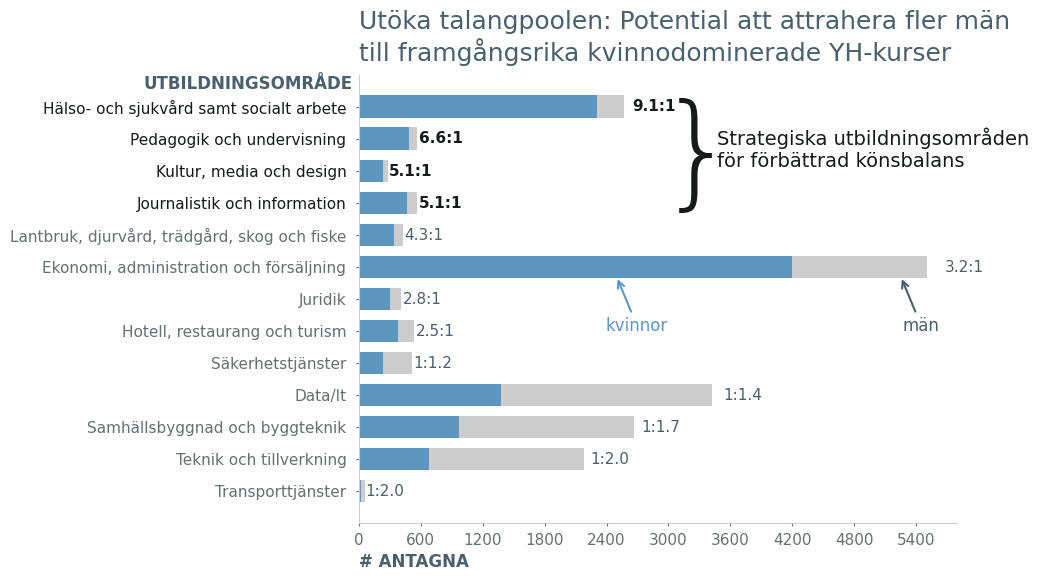

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'left': 'Utöka talangpoolen: Potential att attrahera fler män\ntill framgångsrika kvinnodominerade YH-kurser'}, xlabel='# ANTAGNA', ylabel='UTBILDNINGSOMRÅDE'>)

In [976]:
def plot_stacked_bar_antagna_matplotlib(
        df: pd.DataFrame, 
        year: int = None,
        arrow_idx=None,
        gray_1=GRAY_1, 
        gray_2=GRAY_2, 
        gray_3=GRAY_3,
        gray_4=GRAY_4,
        blue_1=BLUE_1,
        orange_1=ORANGE_1
    ) -> None:
    """
    Plots a horizontal stacked bar chart showing gender distribution of admitted students by education area.
    Uses annotation arrows instead of legend, with consistent styling.
    
    Parameters:
        df: DataFrame with columns: kön, utbildningsområde, ålder, [2020-2024]
        year: Year to plot data for (int or str). If None, uses latest available year
        arrow_idx: Index of category to place arrows on (None = middle category, int = specific index)
    
    Returns:
        fig, ax: Figure and axes objects
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import MaxNLocator
    labelfont = 14
    # Input validation
    if df.empty:
        raise ValueError("DataFrame is empty")
    
    # Rename columns for consistency
    df.columns = ["kön", "utbildningsområde", "ålder", "2020", "2021", "2022", "2023", "2024"]
    df = df.fillna(0)

    # Ensure year columns are int
    year_columns = ["2020", "2021", "2022", "2023", "2024"]
    for col in year_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

    # Melt to long format
    df_long = df.melt(
        id_vars=["kön", "utbildningsområde", "ålder"],
        var_name="år",
        value_name="antal"
    )
    df_long["antal"] = pd.to_numeric(df_long["antal"], errors="coerce").fillna(0).astype(int)

    # Filter data
    df_filtered = df_long[
        (df_long["ålder"].str.lower() == "totalt") & 
        (df_long["utbildningsområde"].str.lower() != "totalt")
    ]

    # Select year
    if year is None:
        year = df_filtered["år"].max()
    year = str(year)
    
    if year not in year_columns:
        raise ValueError(f"Year must be one of {year_columns}")
        
    current_data = df_filtered[df_filtered["år"] == year]

    # Create pivot table
    pivot_df = current_data.pivot_table(
        index="utbildningsområde",
        columns="kön",
        values="antal",
        aggfunc="sum"
    ).fillna(0).reset_index()

    # Format column names
    pivot_df.columns.name = None
    pivot_df.rename(columns={
        "kvinnor": "Kvinnor",
        "män": "Män",
        "totalt": "Totalt"
    }, inplace=True)

    # Ensure numbers are int
    for col in ["Kvinnor", "Män", "Totalt"]:
        if col in pivot_df.columns:
            pivot_df[col] = pd.to_numeric(pivot_df[col], errors="coerce").fillna(0).astype(int)
    
    # Calculate women/men ratio, handle division by zero
    pivot_df["K_M_Ratio"] = pivot_df.apply(
        lambda row: round(row["Kvinnor"] / row["Män"], 1) if row["Män"] > 0 else float('inf'), 
        axis=1
    )
    
    # Filter out rows where either women or men is 0
    pivot_df = pivot_df[(pivot_df["Kvinnor"] > 0) & (pivot_df["Män"] > 0)]
    
    # Sort by women/men ratio
    pivot_df = pivot_df.sort_values("K_M_Ratio", ascending=True)
    
    # If no data after filtering
    if pivot_df.empty:
        print("No data available after filtering zero values")
        return None, None
    
    # Identify top 4 areas with highest women-to-men ratio
    top_areas = pivot_df.sort_values("K_M_Ratio", ascending=False).head(4)["utbildningsområde"].tolist()
    
    # Define colors (using color scheme from the other function)
    color_women = blue_1   # Blue for women (switching from orange)
    color_men = gray_1     # Gray for men (switching from blue)
    
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data
    y_pos = np.arange(len(pivot_df["utbildningsområde"]))
    bar_height = 0.7  # Same bar height as in first function
    
    # Plot stacked bars - WITH WOMEN FIRST, then men stacked on top
    ax.barh(y_pos, pivot_df["Kvinnor"], height=bar_height, color=color_women)
    ax.barh(y_pos, pivot_df["Män"], height=bar_height, color=color_men, 
            left=pivot_df["Kvinnor"])  # Stack men on top of women
    
    # Remove clutter (same style as in first function)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['bottom', 'left']].set_color(gray_1)
    ax.tick_params(axis="both", colors=gray_2, labelsize=11, length=2, pad=5)
    ax.tick_params(axis="y", pad=7)
    
    # Axis labels and title with consistent styling
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pivot_df["utbildningsområde"])
    
    # Highlight top areas with different color (just like in the first function)
    for i, label in enumerate(ax.get_yticklabels()):
        area_name = pivot_df["utbildningsområde"].iloc[i]
        if area_name in top_areas:
            label.set_color(gray_4)  # Darker color for top areas
            #label.set_fontweight('bold')
        else:
            label.set_color(gray_2)  # Standard color
    
    
    ax.set_ylabel("UTBILDNINGSOMRÅDE", loc="top",
                  fontdict=dict(color=gray_3, weight="bold", size=12), rotation=0)
    ax.yaxis.set_label_coords(-0.01, 0.96)
    ax.set_xlabel("# ANTAGNA", loc="left",
                  fontdict=dict(color=gray_3, weight="bold", size=12))
    
    ax.set_title(
        f"Utöka talangpoolen: Potential att attrahera fler män\ntill framgångsrika kvinnodominerade YH-kurser",
        pad=10,
        fontdict=dict(color=gray_3, size=18),
        loc="left",
    )
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Add ratio annotations with consistent styling
    for i, (total, ratio) in enumerate(zip(
        pivot_df["Totalt"], pivot_df["K_M_Ratio"]
    )):
        area_name = pivot_df["utbildningsområde"].iloc[i]
        
        # Format ratio text as "W:M" where either W or M is 1
        if ratio >= 1:
            ratio_text = f"{ratio:.1f}:1"
        else:
            ratio_text = f"1:{round(1/ratio, 1)}"
        
        # Use same color logic as for labels
        text_color = gray_4 if area_name in top_areas else gray_3
        font_weight = 'bold' if area_name in top_areas else 'normal'
        
        # Add ratio text with consistent styling
        ax.text(
            total + (total * 0.03),  # Position after the bar
            i,
            ratio_text,
            va='center',
            ha='left',
            color=text_color,
            fontweight=font_weight,
            fontsize=11
        )
    
    # Determine which category to use for arrows (default to middle)
    if arrow_idx is None:
        # Default to middle category
        arrow_idx = len(pivot_df) // 2
    elif isinstance(arrow_idx, int):
        # Make sure index is valid
        arrow_idx = min(max(0, arrow_idx), len(pivot_df) - 1)
    else:
        # Fallback to middle category if invalid
        arrow_idx = len(pivot_df) // 2
    
    # Get values for the selected category
    arrow_category_pos = arrow_idx  # Y-position of selected category
    arrow_men = pivot_df["Män"].iloc[arrow_idx]
    arrow_women = pivot_df["Kvinnor"].iloc[arrow_idx]
    arrow_total = pivot_df["Totalt"].iloc[arrow_idx]
    
    # Add arrow for men
    ax.annotate(
        "män",
        xy=(arrow_women + arrow_men/2+400, arrow_category_pos-0.3),  # Point to middle of men bar
        xytext=(arrow_women +arrow_men/2+600, arrow_category_pos - 2),  # Position slightly offset
        arrowprops=dict(
            arrowstyle="->",
            color=gray_3,
            linewidth=1.5
        ),
        fontsize=12,
        color=gray_3,
        ha="center",
        #fontweight="bold"
    )
    
    # Add arrow for women
    ax.annotate(
        "kvinnor",
        xy=(arrow_women/2+400, arrow_category_pos-0.3),  # Point to middle of women bar
        xytext=(arrow_women/2+600, arrow_category_pos - 2),  # Position slightly offset
        arrowprops=dict(
            arrowstyle="->",
            color=color_women,
            linewidth=1.5
        ),
        fontsize=12,
        color=color_women,
        ha="center",
        #fontweight="bold"
    )

    ax.annotate(
    xy=(2900, 9.3), 
    text="}", 
    fontsize=90, 
    color=GRAY_4,
    fontfamily='DejaVu Sans',  # Choose a font with thinner characters
    fontweight='light'
    )
    # Add annotation for top 4 areas with highest women-to-men ratio
    if len(top_areas) >= 4:
        # Get position of the first of the top areas
        top_area_pos = np.where(pivot_df["utbildningsområde"] == top_areas[0])[0][0]
        
        ax.annotate(
            "Strategiska utbildningsområden \nför förbättrad könsbalans",
            xy=(pivot_df["Totalt"].iloc[top_area_pos] + 20, top_area_pos),
            xytext=(pivot_df["Totalt"].iloc[top_area_pos] + 900, top_area_pos-2.0),
            fontsize=14,
            color=gray_4,
            ha="left",
            va="bottom",
        )
    
   
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    # Show plot
    plt.show()
    
    return fig, ax

# Example with specified arrow position
plot_stacked_bar_antagna_matplotlib(df, year='2024', arrow_idx=7)